# Transmission of Air with $O_3$ absorption
==============================================================


The purpose is to calculate the transmission of air due to $O_3$ component at OHP site.

- author : Sylvie Dagoret-Campagne
- date :May  2nd 2017
- Update May 6th 2017

$O_3$ from Hitran and O3 from LibRadtran/CRS

In [188]:
import numpy as np
import pandas as pd

# Set up matplotlib and use a nicer set of plot parameters
#%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt

%matplotlib inline

#import matplotlib as mpl

In [189]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [190]:
import os

In [191]:
from netCDF4 import Dataset

In [192]:
from spacepy import pycdf
import datetime

os.environ["CDF_LIB"]='/Users/dagoret-campagnesylvie/MacOsX/External/cdf/cdf/lib'
os.environ["CDF_LIB"]='/Users/dagoret-campagnesylvie/MacOsX/External/netcdf/lib'

# Initialisation

## Constants

In [193]:
Pa_to_Atm = 0.00000986923267
hPa_to_Atm=Pa_to_Atm*100  # libRadTran provides pressure in hPa
Atm_to_Pa = 1.01325*1e5 
Atm_to_hPa = 1.01325*1e3 

In [194]:
m_to_cm=100.

In [195]:
path='/Users/dagoret-campagnesylvie/MacOsX/LSST/softs/libRadtran-2.0.1/data/correlated_k/reptran'

In [196]:
ls /Users/dagoret-campagnesylvie/MacOsX/LSST/softs/libRadtran-2.0.1/data/correlated_k/reptran | grep O3

reptran_solar_coarse.lookup.O3.cdf
reptran_solar_envisat.lookup.O3.cdf
reptran_solar_ers.lookup.O3.cdf
reptran_solar_fine.lookup.O3.cdf
reptran_solar_medium.lookup.O3.cdf
reptran_solar_msg.lookup.O3.cdf
reptran_solar_sentinel.lookup.O3.cdf
reptran_thermal_coarse.lookup.O3.cdf
reptran_thermal_earthcare.lookup.O3.cdf
reptran_thermal_envisat.lookup.O3.cdf
reptran_thermal_ers.lookup.O3.cdf
reptran_thermal_fine.lookup.O3.cdf
reptran_thermal_landsat.lookup.O3.cdf
reptran_thermal_medium.lookup.O3.cdf
reptran_thermal_msg.lookup.O3.cdf
reptran_thermal_sentinel.lookup.O3.cdf


In [197]:
file_O3_list= ['reptran_solar_coarse.lookup.O3.cdf','reptran_solar_medium.lookup.O3.cdf','reptran_solar_fine.lookup.O3.cdf',
...            'reptran_solar_ers.lookup.O3.cdf','reptran_solar_msg.lookup.O3.cdf','reptran_solar_sentinel.lookup.O3.cdf']

## Test pycdf

In [198]:
fullfilename=os.path.join(path,file_O3_list[2])

In [199]:
print fullfilename

/Users/dagoret-campagnesylvie/MacOsX/LSST/softs/libRadtran-2.0.1/data/correlated_k/reptran/reptran_solar_fine.lookup.O3.cdf


## try opening with pycdf

- failed because this cdf format is not recognized

In [200]:
#cdf = pycdf.CDF(fullfilename)

## try opening with netcdf

In [201]:
fh = Dataset(fullfilename, mode='r')

In [202]:
fh

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): nwvl(8792), n_vmrs(1), n_pressure(41), n_t_pert(9)
    variables(dimensions): float64 wvl(nwvl), int32 wvl_index(nwvl), float64 pressure(n_pressure), float64 vmrs(n_vmrs), float64 t_ref(n_pressure), float64 t_pert(n_t_pert), float32 xsec(n_t_pert,n_vmrs,nwvl,n_pressure)
    groups: 

In [203]:
print fh.dimensions.keys()

[u'nwvl', u'n_vmrs', u'n_pressure', u'n_t_pert']


In [204]:
print fh.dimensions['nwvl']

<type 'netCDF4._netCDF4.Dimension'>: name = 'nwvl', size = 8792



In [205]:
print fh.dimensions['n_vmrs']

<type 'netCDF4._netCDF4.Dimension'>: name = 'n_vmrs', size = 1



In [206]:
print fh.dimensions['n_pressure']

<type 'netCDF4._netCDF4.Dimension'>: name = 'n_pressure', size = 41



In [207]:
print fh.dimensions['n_t_pert']

<type 'netCDF4._netCDF4.Dimension'>: name = 'n_t_pert', size = 9



In [208]:
print fh.variables.keys()

[u'wvl', u'wvl_index', u'pressure', u'vmrs', u't_ref', u't_pert', u'xsec']


In [209]:
print fh.variables['wvl']

<type 'netCDF4._netCDF4.Variable'>
float64 wvl(nwvl)
unlimited dimensions: 
current shape = (8792,)
filling off



In [210]:
print fh.variables['wvl_index']

<type 'netCDF4._netCDF4.Variable'>
int32 wvl_index(nwvl)
unlimited dimensions: 
current shape = (8792,)
filling off



In [211]:
print fh.variables['pressure']

<type 'netCDF4._netCDF4.Variable'>
float64 pressure(n_pressure)
unlimited dimensions: 
current shape = (41,)
filling off



In [212]:
print fh.variables['vmrs']

<type 'netCDF4._netCDF4.Variable'>
float64 vmrs(n_vmrs)
unlimited dimensions: 
current shape = (1,)
filling off



In [213]:
print fh.variables['t_ref']

<type 'netCDF4._netCDF4.Variable'>
float64 t_ref(n_pressure)
unlimited dimensions: 
current shape = (41,)
filling off



In [214]:
print fh.variables['t_pert']

<type 'netCDF4._netCDF4.Variable'>
float64 t_pert(n_t_pert)
unlimited dimensions: 
current shape = (9,)
filling off



In [215]:
print fh.variables['xsec']

<type 'netCDF4._netCDF4.Variable'>
float32 xsec(n_t_pert, n_vmrs, nwvl, n_pressure)
unlimited dimensions: 
current shape = (9, 1, 8792, 41)
filling off



In [216]:
for attr in fh.ncattrs(): 
...     print attr, '=', getattr(dataset, attr) 

In [217]:
wvl = fh.variables['wvl'][:]
wvl_index = fh.variables['wvl_index'][:]
pressure = fh.variables['pressure'][:]
vmrs = fh.variables['vmrs'][:]
t_ref= fh.variables['t_ref'][:]
t_pert= fh.variables['t_pert'][:]
xsec= fh.variables['xsec'][:,:,:,:]
#xsec_units = fh.variables['wvl'].units


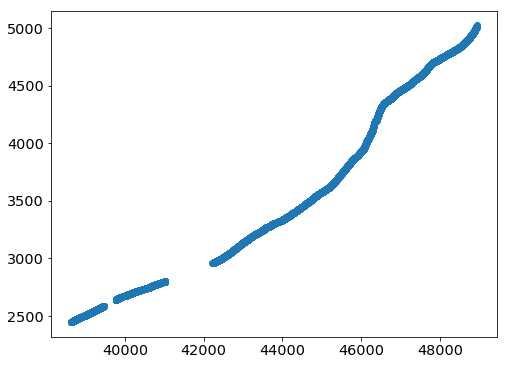

In [218]:
plt.plot(wvl_index,wvl,'o')

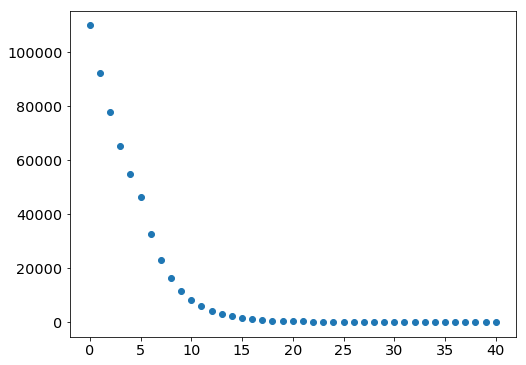

In [219]:
plt.plot(pressure,'o')

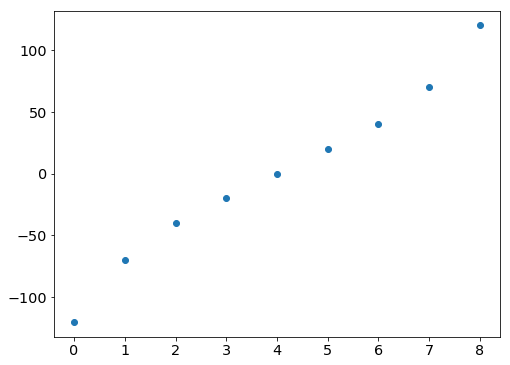

In [220]:
plt.plot(t_pert,'o')

In [221]:
xsec0=xsec[4,0,:,1]

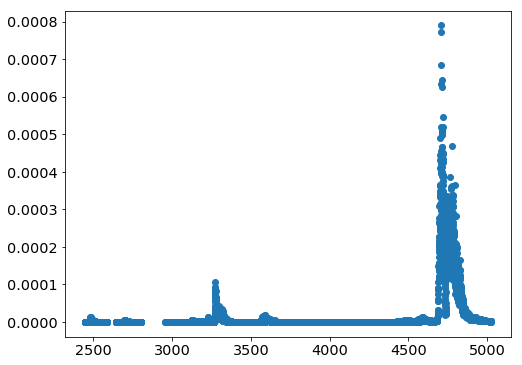

In [222]:
plt.plot(wvl,xsec0,'o')

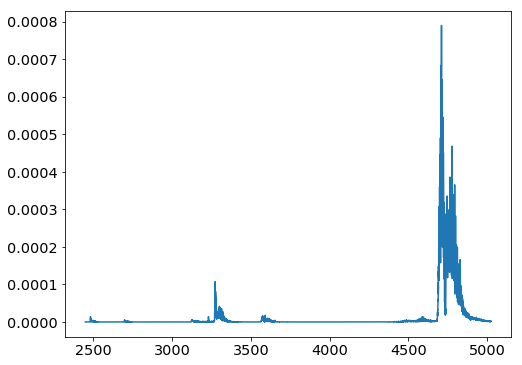

In [223]:
plt.plot(wvl,xsec0)
#plt.xlim(2000.,3000.)
#plt.ylim(0,0.00001)